In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import matplotlib
import analysis_pca

Ts = 1000
data_path = r'C:\Users\IBS\Desktop\python_code_N2'
save_path = r'C:\Users\IBS\Desktop\figures'

In [2]:
import generate_linear_model

In [3]:
#For FN angle averaged PCA

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)
apca = analysis_pca.analysis_pca(Ts, data_cat, save_path)
data_cat_sm = apca.smoothing_data()  # Smoothed data
data = np.mean(data_cat_sm, axis=0)  # Anagle averged data
PCA_total = apca.pca_analy(data)  # PCA

Wa = PCA_total['v'][:4]  # Wight matrix from angle averaged PCA

Dimensions: 1, Variance explained: 75.06%
Dimensions: 2, Variance explained: 85.13%
Dimensions: 3, Variance explained: 90.34%
Dimensions: 4, Variance explained: 93.95%
Dimensions: 5, Variance explained: 96.15%
Dimensions to be reduced: 3


In [4]:
peak = []
for a in range(np.shape(val_cat)[0]):
    M = []
    for ori in range(8):
        temp = val_cat[a][ori]
        M.append(np.max(temp,axis = 1))
        # peak[a][ori]  = np.max(temp,axis = 1)
    peak.append(M)

peak = np.array(peak, dtype = object)

In [5]:
final = []
for ori_num in range(8):
    finalp=[]
    for a in range(np.shape(data_cat)[0]):
        temp_data = data_cat[a][ori_num]
        pram = np.array([peak[a][ori_num], dur_cat[a][ori_num]])
        pram2= np.mean(pram, axis = 1)
        
        linmod = generate_linear_model.generate_linear_model(temp_data, pram, pram2);
        finalp.append(linmod)
    final.append(finalp)

In [6]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from matplotlib import gridspec
from filter_matrix import filter_matrix

plot_data = {}
for ori_num in range(8):
    
    pp1, pp2, pp3, pp4, pp5 = [], [], [], [], []
    for a in range(np.shape(final)[1]):
        temp = final[ori_num][a]
        pp1.append(temp['wv0'])
        pp2.append(temp['wv'])
        pp3.append(temp['wr'])
        pp4.append(temp['ssc'])
        pp5.append(temp['ssc0'])

    # Stack and smooth
    zpp1 = filter_matrix(np.array(pp1), sigma=2)
    zpp2 = filter_matrix(np.array(pp2), sigma=2)
    zpp3 = filter_matrix(np.array(pp3), sigma=2)
    zpp4 = filter_matrix(np.array(pp4), sigma=2)
    zpp5 = filter_matrix(np.array(pp5), sigma=2)

    plot_data[ori_num] = [zpp1, zpp2, zpp3, zpp4, zpp5]

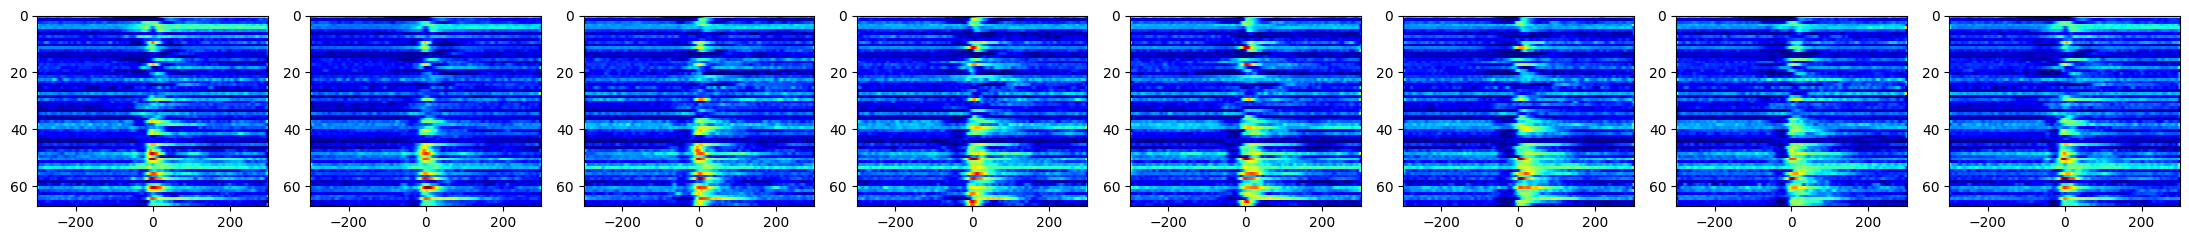

In [11]:
# Plotting for each
# for b in range(5):
# up ur r dr down dl l ul -> right ur u ul left dl d dr [2, 1, 0, 7, 6, 5, 4, 3]
b = 4
fig = plt.figure(figsize=(22, 2.5))
gs = gridspec.GridSpec(1, 8)
time = np.arange(-300, 300)
# for a in range(8):
c = 0
# for a in [2, 1, 0, 7, 6, 5, 4, 3]:
for a in range(8):
    ax = fig.add_subplot(gs[0, c])
    ax.imshow(plot_data[a][b], aspect='auto', cmap='jet', interpolation='none', extent=[-300, 300, 67, 0])
    # ax.set(xticks=np.linspace(-300, 300, 10), xticklabels=np.arange(-300, 300, 100))
    # ax.set_xticklabels([-300, 300])
    # ax.set_xlim([-300, 300])
    c = c + 1
plt.tight_layout()

# plt.savefig('linear_model.jpg', dpi=300)
plt.show()

# extent=[0, 120, 10, 0]);
# ax.set(xticks=np.linspace(-300, 300, 10), xticklabels=np.arange(-300, 300, 100), yticks=[0, 10], yticklabels=[0, 1]);